$$ME = \frac{P_1-P_2}{P_1+P_2}$$
$$P_{ave} = P_1+P_2$$

The electrical signals in cryogenic environment are typically millivolts in amplitude and several picoseconds in width. These ultra-low energies and high bandwidth pulses make modulation scheme prohibitively challenge. To achieve a satisfactory bit error rate (BER), the modulator should provide an sufficient modulation efficiency when driven by electrical signal with millivolts electrical signals. Otherwise, to maintain the signal to noise ratio (SNR), a strong input optical power is required to launch into the photo-detector. However, the strong optical power will violate the system power constrains and cause the saturation of photodiode, which result in even worse signal contrast.

We quantitatively evaluate the relation between modulation efficiency and required optical signal power to achieve a certain BER. The BER can be estimated from signal's quality (Q) factor using $\textrm{BER} = \frac{1}{2}\textrm{erfc}(\frac{Q}{\sqrt{2}})$. The Q-factor is defined as: $Q = \frac{I_1 - I_0}{\sigma_1 + \sigma_0}$ and suggests the minimum SNR to obtained a specific BER for a given signal. $I_{1,~0}$ is mean value of photocurrent of one level and zero level signals, and $I_{1,~0} = R \times P_{1,~0}$. In the photo-detector, thermal noise, shot noise, dark noise and the laser's relative intensity noise (RIN) are take into account to evaluate $\sigma_1$ and $\sigma_0$. To associate the sensitivity of optical modulator and the BER, we induce modulation efficiency $\textrm{ME} = \frac{P_1 - P_0}{P_1 + P_0}$ and average optical power $P_{ave} = \frac{P_1+P_0}{2}$. Then the Q-factor can be expressed as:

$Q = \frac{RMEP_{ave}}{\sqrt{q\Delta fRP_{ave}}(\sqrt{1+ME} + \sqrt{1-ME}) + \sqrt{2q\Delta fI_d} +\sqrt{(4k_BT/R_L)\Delta f} + P_{ave}RIN}$,


where $R$ is the responsitivity, $\Delta f$ is the bandwidth, $I_d$ is the dark current, $R_L$ is the load resistor of the photo-detector, $k_BT$ is Boltzmann’s constant, $T$ is the absolute temperature, $RIN$ is the RIN of the laser. Here we assume a photo-detector having $R = \textrm{1~A/W}$, $\Delta f = \textrm{10~GHz}$, $I_d = \textrm{3~nA}$, $R_L = 50~\Omega$, and a laser having $RIN = \textrm{-140~dB/Hz}$. Fig.~\ref{Modulator_MD_performance} plots the required average power to achieve a specific BER at different ME conditions. The required average power increases significantly when the ME becomes worse than 0.005. We map the state of the art modulators to the curve in Fig.~\ref{Modulator_MD_performance} by assuming that their electrical input  has a amplitude of 5 mV (the signal after stacked SQUID amplifier). The ME of each modulator is derived from the modulated signal's extinction ratio driven by the corresponding Vpp. 

### The shot noise, dark noise, thermal noise and RIN noise (from the laser) are considered in the detection system

$$\textrm{BER} = \frac{1}{2}\textrm{erfc}(\frac{Q}{\sqrt{2}})$$
$$Q =\frac{I_1 - I_0}{\sigma_1 + \sigma_0}$$
$$I_{1,0} = R \times P_{1, 0}$$
$$\sigma_{1, 0} = \sqrt{2qI_{1,0} \Delta f}+ \sqrt{2qI_d \Delta f}+ \sqrt{(4k_BT/R_L)\Delta f} +  RP_{1, 0}RIN $$

$$R = 1~A/W$$
$$R_L = 50~Ohm$$
$$\Delta f = 10 GHz$$
$$I_d = 3 nA$$
$$RIN = 10^{-9}$$

In [5]:
import sympy as sp
from IPython.display import display

def make_positive_symbol(name):
    return sp.Symbol(name, positive=True)

def make_positive_symbols(*names):
    return tuple([make_positive_symbol(name) for name in names])

R, R_L, Δf, I_d, RIN, k_B, T, q = make_positive_symbols("R", "R_L", "Δf", "I_d", "RIN", 'k_B', 'T', 'q')
display(R, R_L, Δf, I_d, RIN)

P_avg, ME = make_positive_symbols("P_{avg}", "ME")
P1 = (ME + 1) * P_avg
P0 = (1 - ME) * P_avg
display(P1, P0)

I1, I0 = R * P1, R * P0

def shot_noise(I):
    return sp.sqrt(2 * q * I * Δf)

thermal_noise = sp.sqrt(4 * k_B * T / R_L * Δf)

def RIN_noise(P):
    return R * P * RIN

dark_current_noise = sp.sqrt(2 * q * I_d * Δf)

σ1 = shot_noise(I1) + thermal_noise + RIN_noise(P1) + dark_current_noise
σ0 = shot_noise(I0) + thermal_noise + RIN_noise(P0) + dark_current_noise

σ_sum = sp.simplify(σ1 + σ0)
display(σ_sum)

Q_expr = sp.simplify((I1 - I0) / σ_sum)
I_diff = sp.simplify(I1 - I0)
display(Q_expr)

Q = make_positive_symbol("Q")
P_avg_as_function_of_Q = sp.solve(I_diff - Q * σ_sum, P_avg)[1]


R

R_L

Δf

I_d

RIN

P_{avg}*(ME + 1)

P_{avg}*(-ME + 1)

2*sqrt(2)*sqrt(I_d)*sqrt(q)*sqrt(Δf) + sqrt(2)*sqrt(P_{avg})*sqrt(R)*sqrt(q)*sqrt(Δf)*sqrt(-ME + 1) + sqrt(2)*sqrt(P_{avg})*sqrt(R)*sqrt(q)*sqrt(Δf)*sqrt(ME + 1) + 2*P_{avg}*R*RIN + 4*sqrt(T)*sqrt(k_B)*sqrt(Δf)/sqrt(R_L)

2*ME*P_{avg}*R*sqrt(R_L)/(sqrt(R_L)*(2*sqrt(2)*sqrt(I_d)*sqrt(q)*sqrt(Δf) + sqrt(2)*sqrt(P_{avg})*sqrt(R)*sqrt(q)*sqrt(Δf)*sqrt(-ME + 1) + sqrt(2)*sqrt(P_{avg})*sqrt(R)*sqrt(q)*sqrt(Δf)*sqrt(ME + 1) + 2*P_{avg}*R*RIN) + 4*sqrt(T)*sqrt(k_B)*sqrt(Δf))

$$ Q = \sqrt{2}\textrm{erfc}^{-1}(2 \textrm{BER}) $$

(2**(3/4)*(-1.0e-9*sqrt(2)*erfcinv(2*BER) + 0.7)**2*sqrt(-4.0753651459414e-20*sqrt(3)*erfcinv(2*BER) - 1.20175961832618e-22*erfcinv(2*BER) + 1.88050283885348e-14*sqrt(2)*erfcinv(2*BER) + 4.20615866414162e-14*sqrt(2) + 1.42637780107949e-11*sqrt(6))*erfcinv(2*BER)**(3/2) + sqrt(2)*(2.0e-18*erfcinv(2*BER)**2 - 1.4e-9*sqrt(2)*erfcinv(2*BER) + 0.49)*(-1.48593404968054e-13*sqrt(3)*erfcinv(2*BER) - 4.38178046004133e-16*erfcinv(2*BER) + 1.37131427428343e-7*sqrt(2)*erfcinv(2*BER) + 1.53362316101447e-7*sqrt(2) + 5.20076917388188e-5*sqrt(6))*erfcinv(2*BER))/(100*(-1.0e-9*sqrt(2)*erfcinv(2*BER) + 0.7)**2*(2.0e-18*erfcinv(2*BER)**2 - 1.4e-9*sqrt(2)*erfcinv(2*BER) + 0.49))

Text(0, 0.5, 'Average Power [W]')

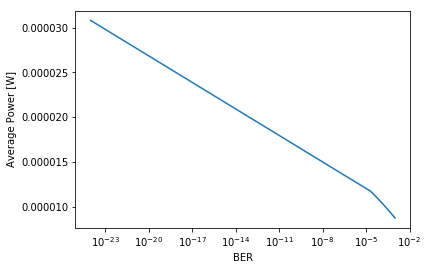

In [6]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np 

BER = make_positive_symbols("BER")[0]
Q_func = sp.sqrt(2)*sp.erfcinv(2*BER)

params = [(R, 1),
          (R_L, 50),
          (Δf, 10E9),
          (I_d, 3e-9),
          (RIN, 1E-9),
          (k_B, 1.38E-23),
          (T, 300),
          (q, 1.6E-19),
          (ME, 0.7),
          (Q, Q_func)
          ]

P_avg_function_of_BER = P_avg_as_function_of_Q.subs(params)
display(P_avg_function_of_BER)
f_BER = sp.lambdify((BER), P_avg_function_of_BER)

BER_sweep = np.linspace(1e-3,1e-24)
plt.semilogx(BER_sweep, f_BER(BER_sweep))
plt.xlabel('BER')
plt.ylabel('Average Power [W]')